In [2]:
import torch
import json
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter("ignore")

In [3]:
def load_exp(setting, json_file):
    folder = "../exps"
    #json_file = "exp.json"
    json_path = os.path.join(folder, setting, json_file)
    with open(json_path, "r") as f:
        exp = json.load(f)
    
    #models_tensors = exp["models_tensors"]
    #models_state_dicts = torch.load(models_tensors)
    

    return {"permutation_seed": exp["permutation_seed"],
            "test_size": exp["test_size"],
            "partition_seed": exp["partition_seed"],
            "n_class": exp["n_class"],
            "all_tr_loss": exp["all_tr_loss"], 
            "all_test_loss": exp["all_test_loss"],
            "all_tr_acc": exp["all_tr_acc"],
            "all_test_acc": exp["all_test_acc"],
            #"models_state_dicts": models_state_dicts
    }

In [4]:
exp1 = load_exp("Setting_1", "exp.json")
exp2 = load_exp("Setting_2", "exp.json")
exp3 = load_exp("Setting_3", "exp.json")
exp4 = load_exp("Setting_4", "exp.json")
exp5 = load_exp("Setting_5", "exp.json")

In [7]:
exp1_1 = load_exp("Setting_1", "exp1.json")
exp1_2 = load_exp("Setting_2", "exp1.json")
exp1_3 = load_exp("Setting_3", "exp1.json")
exp1_4 = load_exp("Setting_4", "exp1.json")
exp1_5 = load_exp("Setting_5", "exp1.json")

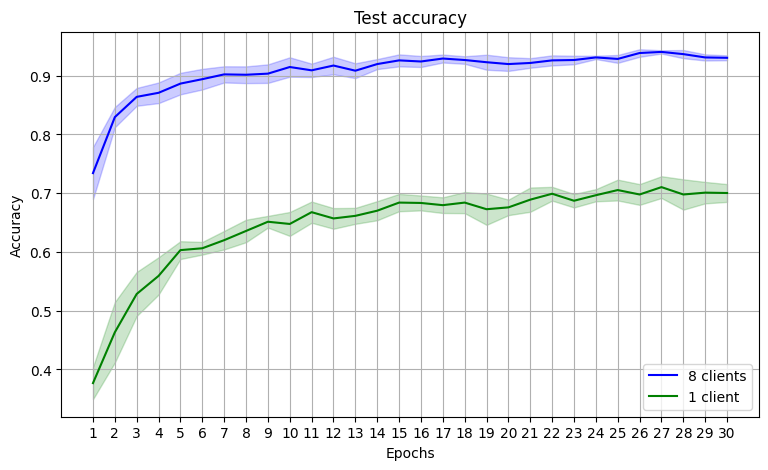

In [8]:
# Compute mean and standard deviation
mean_acc = np.mean([exp1["all_test_acc"], exp2["all_test_acc"],
                   exp3["all_test_acc"], exp4["all_test_acc"],
                   exp5["all_test_acc"]], axis=0)
std_acc = np.std([exp1["all_test_acc"], exp2["all_test_acc"],
                   exp3["all_test_acc"], exp4["all_test_acc"],
                   exp5["all_test_acc"]], axis=0)

mean_acc1 = np.mean([exp1_1["all_test_acc"], exp1_2["all_test_acc"],
                       exp1_3["all_test_acc"], exp1_4["all_test_acc"],
                       exp1_5["all_test_acc"]], axis=0)
std_acc1 = np.std([exp1_1["all_test_acc"], exp1_2["all_test_acc"],
                       exp1_3["all_test_acc"], exp1_4["all_test_acc"],
                       exp1_5["all_test_acc"]], axis=0)




# X-axis values
x_values = np.arange(1, 31)

# Plot
plt.figure(figsize=(9, 5))
plt.plot(x_values, mean_acc, label="8 clients", color='b')
plt.fill_between(x_values, mean_acc - std_acc, mean_acc + std_acc, color='b', alpha=0.2)
plt.plot(x_values, mean_acc1, label="1 client", color='g')
plt.fill_between(x_values, mean_acc1 - std_acc1, mean_acc1 + std_acc1, color='g', alpha=0.2)
plt.xticks(x_values)

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test accuracy")
plt.legend()
plt.grid(True)

# Save plot
plt.savefig("8vs1.png", bbox_inches='tight')

# Show plot
plt.show()

In [12]:
exp8x1_1 = load_exp("Setting_1", "exp8x1.json")
exp8x1_2 = load_exp("Setting_2", "exp8x1.json")
exp8x1_3 = load_exp("Setting_3", "exp8x1.json")
exp8x1_4 = load_exp("Setting_4", "exp8x1.json")
exp8x1_5 = load_exp("Setting_5", "exp8x1.json")

In [13]:
exp2x4_1 = load_exp("Setting_1", "exp2x4.json")
exp2x4_2 = load_exp("Setting_2", "exp2x4.json")
exp2x4_3 = load_exp("Setting_3", "exp2x4.json")
exp2x4_4 = load_exp("Setting_4", "exp2x4.json")
exp2x4_5 = load_exp("Setting_5", "exp2x4.json")

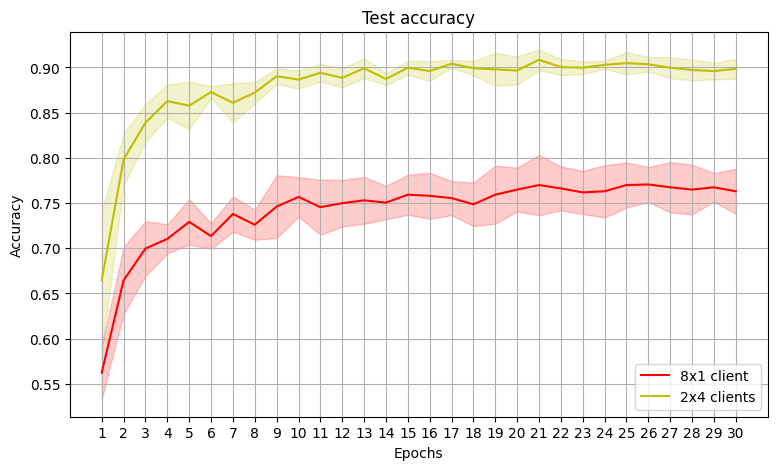

In [14]:
mean_acc8x1 = np.mean([exp8x1_1["all_test_acc"], exp8x1_2["all_test_acc"],
                        exp8x1_3["all_test_acc"], exp8x1_4["all_test_acc"],
                        exp8x1_5["all_test_acc"]], axis=0)
std_acc8x1 = np.std([exp8x1_1["all_test_acc"], exp8x1_2["all_test_acc"],
                        exp8x1_3["all_test_acc"], exp8x1_4["all_test_acc"],
                        exp8x1_5["all_test_acc"]], axis=0)

mean_acc2x4 = np.mean([exp2x4_1["all_test_acc"], exp2x4_2["all_test_acc"],
                      exp2x4_3["all_test_acc"], exp2x4_4["all_test_acc"],
                      exp2x4_5["all_test_acc"]], axis=0)
std_acc2x4 = np.std([exp2x4_1["all_test_acc"], exp2x4_2["all_test_acc"],
                    exp2x4_3["all_test_acc"], exp2x4_4["all_test_acc"],
                    exp2x4_5["all_test_acc"]], axis=0)


# X-axis values
x_values = np.arange(1, 31)

# Plot
plt.figure(figsize=(9, 5))
plt.plot(x_values, mean_acc8x1, label="8x1 client", color='r')
plt.fill_between(x_values, mean_acc8x1 - std_acc8x1, mean_acc8x1 + std_acc8x1, color='r', alpha=0.2)
plt.plot(x_values, mean_acc2x4, label="2x4 clients", color='y')
plt.fill_between(x_values, mean_acc2x4 - std_acc2x4, mean_acc2x4 + std_acc2x4, color='y', alpha=0.2)
plt.xticks(x_values)

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test accuracy")
plt.legend()
plt.grid(True)

# Save plot
plt.savefig("2x4vs8x1.png", bbox_inches='tight')

# Show plot
plt.show()